# Import Dependencies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download Data From Github
original source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
# download data
df = pd.read_csv("https://raw.githubusercontent.com/zixingyu/ds3001-final-project/main/ObesityDataSet_raw_and_data_sinthetic.csv")
# Show the first few rows
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# Data Exploration and Cleaning

## Data Exploration

In [ ]:
# find any missing values
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# data type of each column
print(df.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [ ]:
# number of values of each class of target variable
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
# print values of categorical variable types
for i in ['Gender', 'CAEC', 'CALC', 'MTRANS']:
  print(df[i].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


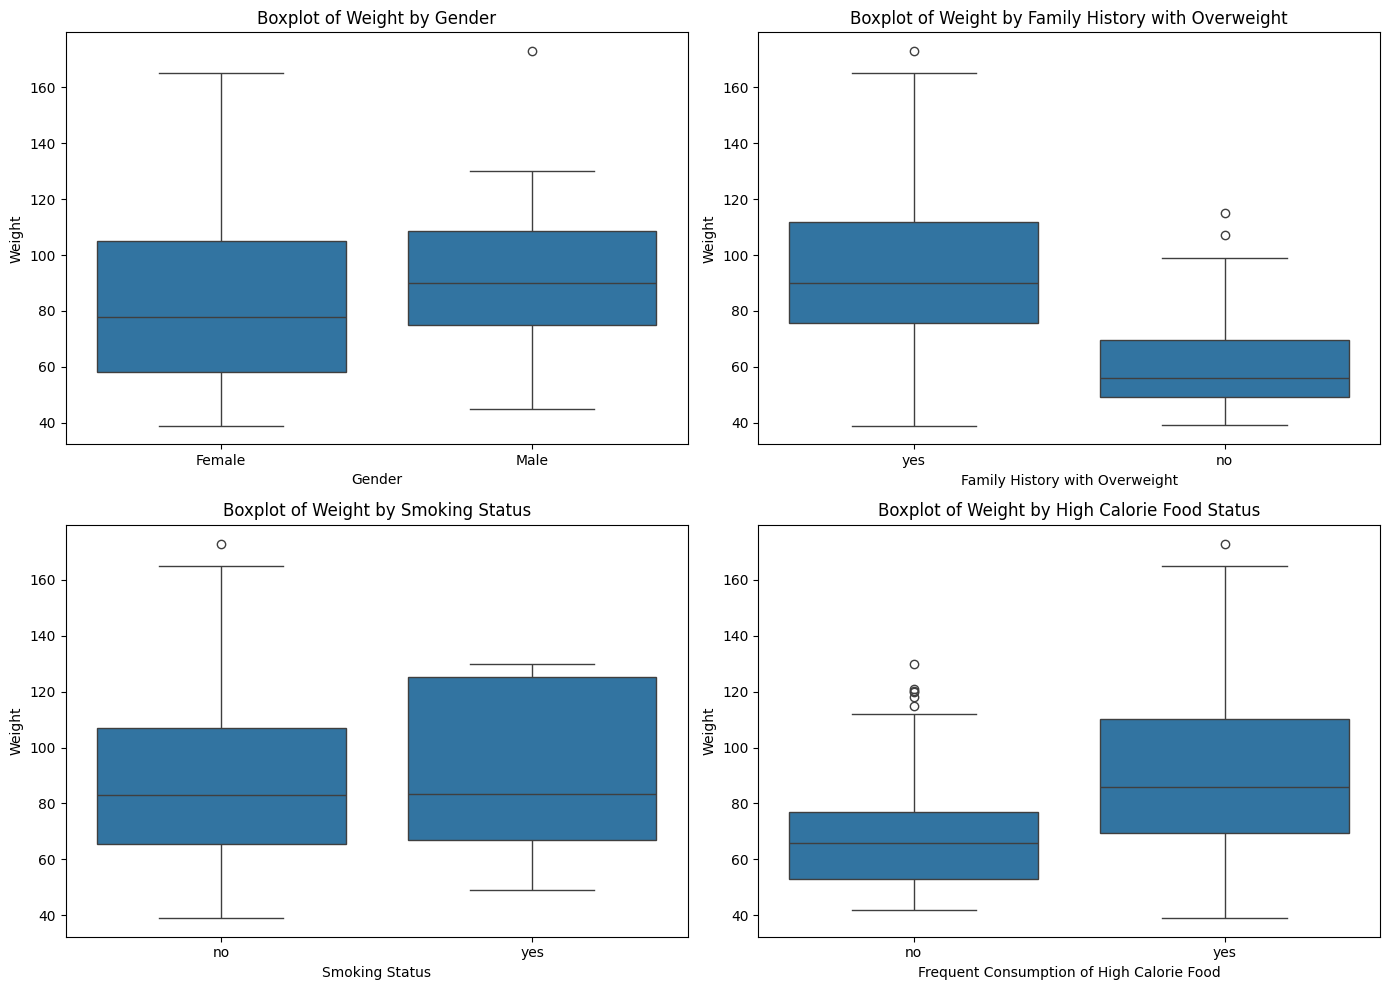

In [ ]:
# Create the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot for Weight by Gender
sns.boxplot(x='Gender', y='Weight', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Weight by Gender')

# Boxplot for Weight by Family History with Overweight
sns.boxplot(x='family_history_with_overweight', y='Weight', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Weight by Family History with Overweight')
axes[0, 1].set_xlabel('Family History with Overweight')

# Boxplot for Weight by Smoking Status
sns.boxplot(x='SMOKE', y='Weight', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Weight by Smoking Status')
axes[1, 0].set_xlabel('Smoking Status')

# Boxplot for Weight by Snacking Status
sns.boxplot(x='FAVC', y='Weight', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Weight by High Calorie Food Status')
axes[1, 1].set_xlabel('Frequent Consumption of High Calorie Food')


plt.tight_layout()
plt.show()


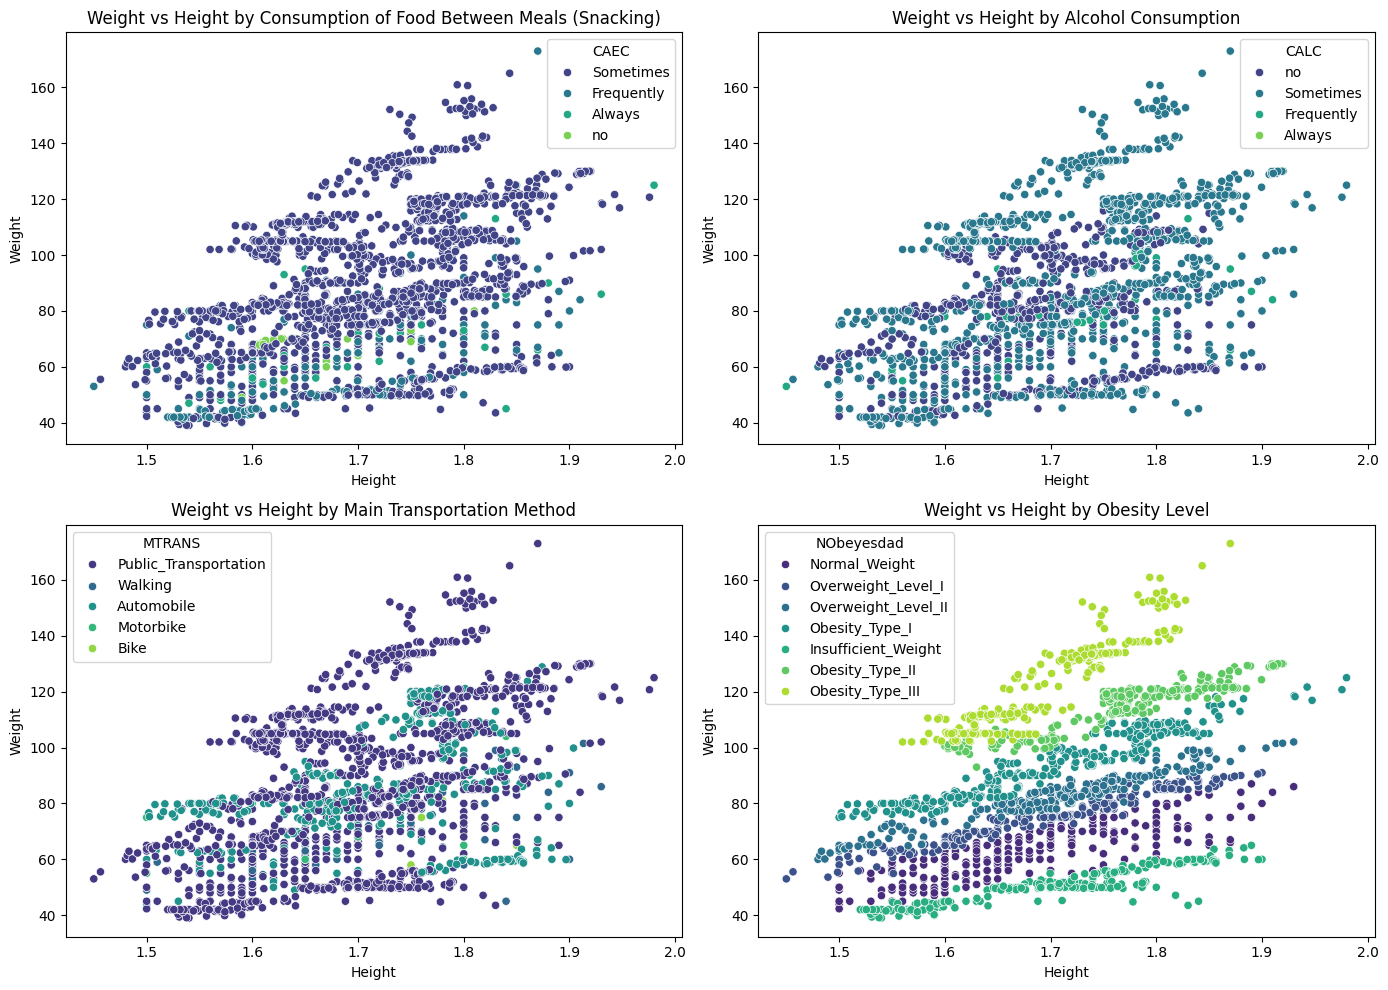

In [ ]:
# Create the figure and subplots )
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for Weight vs Height, colored by CAEC
sns.scatterplot(x='Height', y='Weight', hue='CAEC', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Weight vs Height by Consumption of Food Between Meals (Snacking)')

# Scatter plot for Weight vs Height, colored by CALC
sns.scatterplot(x='Height', y='Weight', hue='CALC', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Weight vs Height by Alcohol Consumption')

# Scatter plot for Weight vs Height, colored by MTRANS
sns.scatterplot(x='Height', y='Weight', hue='MTRANS', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Weight vs Height by Main Transportation Method')

# Scatter plot for Weight vs Height, colored by NObeyesdad
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Weight vs Height by Obesity Level')

plt.tight_layout()
plt.show()


## Data Cleaning

In [ ]:
# ordinal columns
ordinal_columns = ['CAEC', 'CALC', 'NObeyesdad']
# encode the ordinal features
df['CAEC']=df['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
df['CALC']=df['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
df['NObeyesdad']=df['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':
                                       3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
for i in ordinal_columns:
  df[i] = LabelEncoder().fit_transform(df[i])
df[ordinal_columns].head()

,CAEC,CALC,NObeyesdad
0,1,0,1
1,1,1,1
2,1,2,1
3,1,2,2
4,1,1,3


In [ ]:
# one hot encoding for MTRANS since it is not ordinal but there is still a low class number, so it should be fine for distance based
# models since there is not too much dimensionality introduced
df = pd.get_dummies(df, columns=['MTRANS'])
# Convert boolean dummy variables to binary
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,1,no,...,no,0.0,1.0,0,1,False,False,False,True,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,1,yes,...,yes,3.0,0.0,1,1,False,False,False,True,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,1,no,...,no,2.0,1.0,2,1,False,False,False,True,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,1,no,...,no,2.0,0.0,2,2,False,False,False,False,True
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,1,no,...,no,0.0,0.0,1,3,False,False,False,True,False


In [ ]:
# rename dummy variables
df.rename(columns={'MTRANS_0': 'MTRANS_Automobile', 'MTRANS_1': 'MTRANS_Bike', 'MTRANS_2': 'MTRANS_Motorbike', 'MTRANS_3': 'MTRANS_Public_Transportation', 'MTRANS_4': 'MTRANS_Walking'}, inplace=True)
dummy_vars=['MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']
df[dummy_vars].head()

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,True,False


In [ ]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,1,no,...,no,0.0,1.0,0,1,False,False,False,True,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,1,yes,...,yes,3.0,0.0,1,1,False,False,False,True,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,1,no,...,no,2.0,1.0,2,1,False,False,False,True,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,1,no,...,no,2.0,0.0,2,2,False,False,False,False,True
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,1,no,...,no,0.0,0.0,1,3,False,False,False,True,False
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,1,no,...,no,0.0,0.0,1,1,True,False,False,False,False
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,1,no,...,no,1.0,0.0,1,1,False,False,True,False,False
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,1,no,...,no,3.0,0.0,1,1,False,False,False,True,False
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,1,no,...,no,1.0,1.0,2,1,False,False,False,True,False
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,1,no,...,no,1.0,1.0,0,1,False,False,False,True,False


In [ ]:
# numeric columns
numeric_columns = ['Age', 'Height', 'Weight','FCVC','NCP','CH2O','FAF','TUE','CAEC','CALC']
# MinMax scale the numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns].head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC,CALC
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,0.333333,0.000000
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,0.333333,0.333333
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,0.333333,0.666667
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.333333,0.666667
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.333333,0.333333


In [ ]:
# binary columns
binary_columns = ['family_history_with_overweight','FAVC', 'SMOKE', 'SCC']
# recode yes to 1 and no to 0
df[binary_columns] = df[binary_columns].map(lambda x: 1 if x == 'yes' else 0)
df[binary_columns].head()

,family_history_with_overweight,FAVC,SMOKE,SCC
0,1,0,0,0
1,1,0,1,1
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
# code boolean dummy variables to binary
dummy_vars=['MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']
df[dummy_vars] = df[dummy_vars].astype(int)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'].head()

,Gender
0,0
1,0
2,1
3,1
4,1


In [ ]:
#print head of df with all columns
df.head().transpose()

,0,1,2,3,4
Gender,0.000000,0.000000,1.000000,1.000000,1.000000
Age,0.148936,0.148936,0.191489,0.276596,0.170213
Height,0.320755,0.132075,0.660377,0.660377,0.622642
Weight,0.186567,0.126866,0.283582,0.358209,0.379104
family_history_with_overweight,1.000000,1.000000,1.000000,0.000000,0.000000
FAVC,0.000000,0.000000,0.000000,0.000000,0.000000
FCVC,0.500000,1.000000,0.500000,1.000000,0.500000
NCP,0.666667,0.666667,0.666667,0.666667,0.000000
CAEC,0.333333,0.333333,0.333333,0.333333,0.333333
SMOKE,0.000000,1.000000,0.000000,0.000000,0.000000


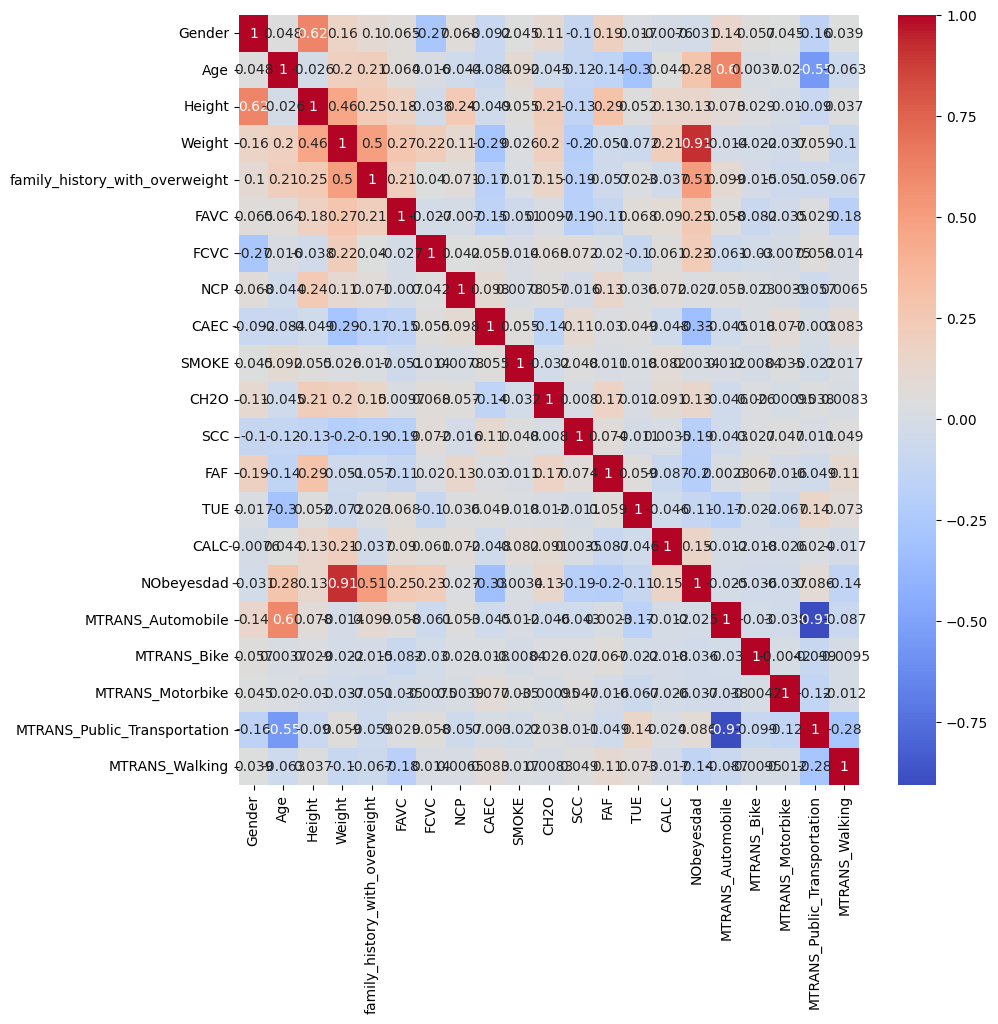

In [ ]:
# correlation plot
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Split data into train and test sets

In [ ]:
# X = all features
X = df.drop('NObeyesdad', axis=1)

# y = target variable
y = df['NObeyesdad']

# Split into 80% train, 20% test, stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=3001,stratify=y)

# confirm the split
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Class distribution in train set:\n", y_train.value_counts(normalize=True))
print("Class distribution in test set:\n", y_test.value_counts(normalize=True))

Train set size: (1688, 20)
Test set size: (423, 20)
Class distribution in train set:
 NObeyesdad
4    0.166469
6    0.153436
5    0.140403
2    0.137441
3    0.137441
1    0.135664
0    0.129147
Name: proportion, dtype: float64
Class distribution in test set:
 NObeyesdad
4    0.165485
6    0.153664
5    0.141844
1    0.137116
3    0.137116
2    0.137116
0    0.127660
Name: proportion, dtype: float64


# KNN Model Creation and Validation

## Model Creation

In [ ]:
# Range of k values to test
k_values = range(1, 30)
accuracies = []

Manhattan distance is used because it is better suited for high dimensional data like ours and when there is little to correlation between variables like in our data.

In [ ]:
# Test classification accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights="uniform")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

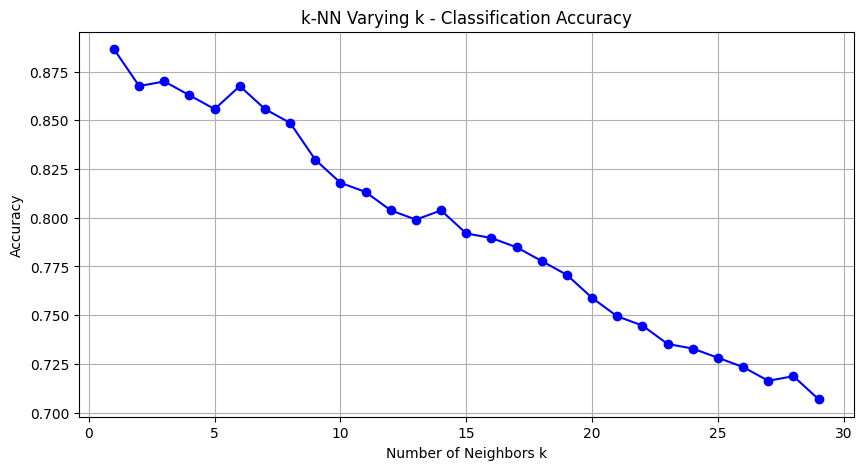

In [ ]:
# Plotting accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Varying k - Classification Accuracy')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

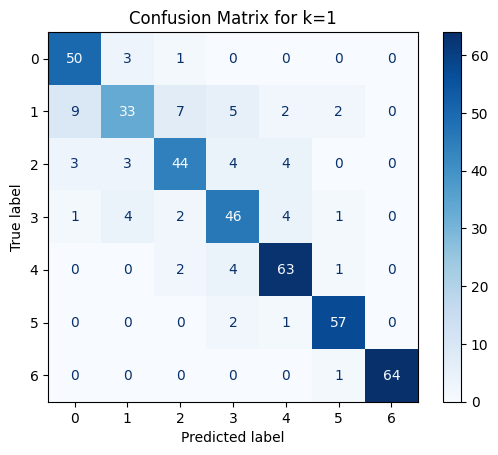

<Figure size 800x600 with 0 Axes>

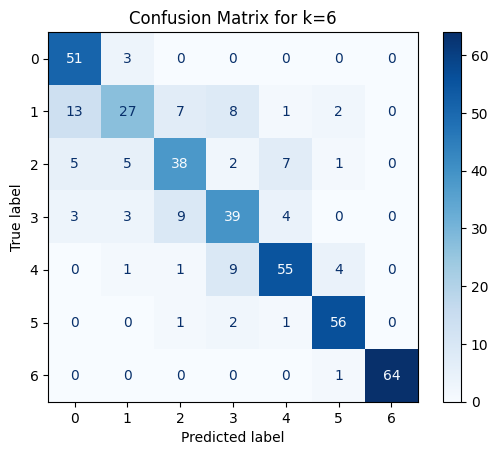

<Figure size 800x600 with 0 Axes>

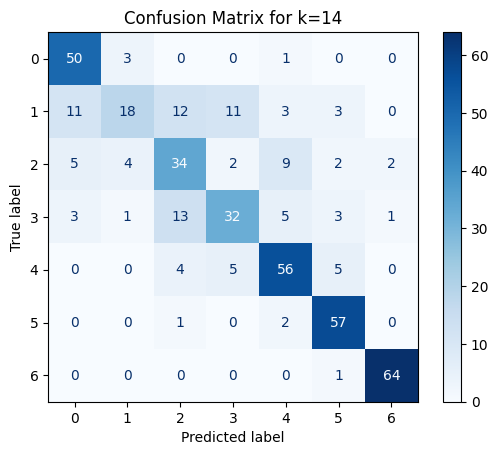

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

# Plot confusion matrices for k = 1, 10, 20
for k in [1, 6, 14]:
    plot_confusion_matrix(k)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6, weights="uniform",metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8676122931442081

In [ ]:
# calculate F1 score for model
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.8652303278398831


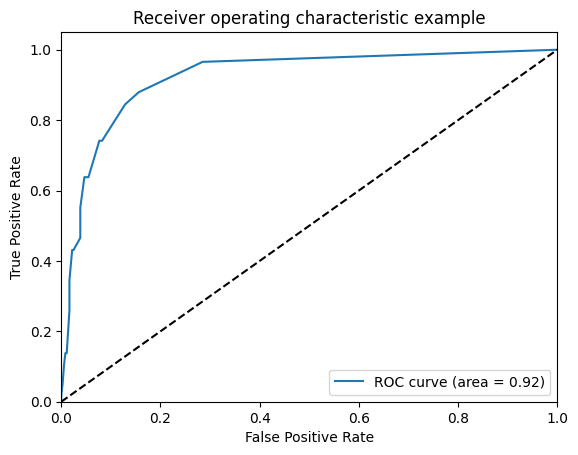

In [ ]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Use OneVsRestClassifier for multi-class ROC AUC
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=14, weights="uniform",metric="manhattan"))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific class (e.g., class 1)
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Model Validation

In [ ]:
# k folds cross validation for k=10
from sklearn.model_selection import cross_val_score, KFold
# Create a KFold object with random_state
kf = KFold(n_splits=10, shuffle=True, random_state=3001)
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
average_score = scores.mean()
print("Average accuracy:", average_score)

Average accuracy: 0.8451019404453188


# Random Forest Creation and Validation

## Model Creation

Test Accuracy: 0.9598108747044918
Train Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.85      0.98      0.91        58
           2       0.92      0.93      0.92        58
           3       1.00      0.90      0.95        58
           4       0.97      0.97      0.97        70
           5       1.00      0.98      0.99        60
           6       1.00      0.98      0.99        65

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



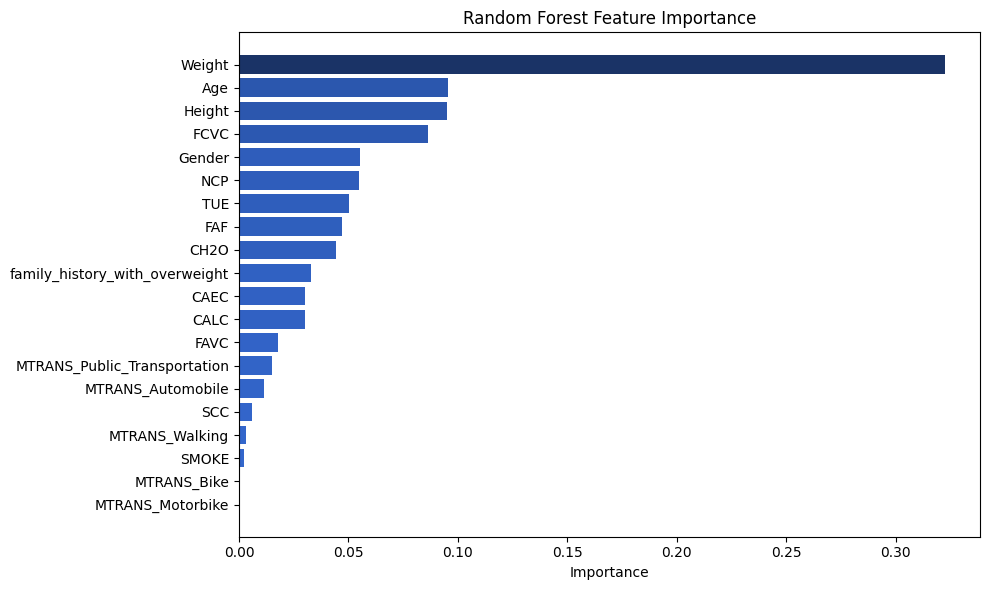

<Figure size 800x600 with 0 Axes>

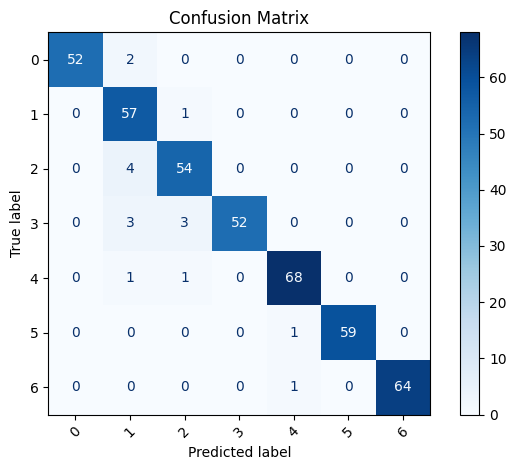

Accuracy with top features: 0.950354609929078
Accuracy with top features: 1.0


<Figure size 800x600 with 0 Axes>

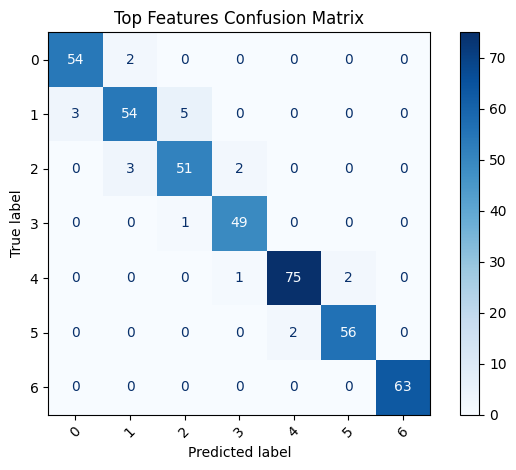

In [ ]:
model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=20)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

#evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
#train accuracy
train_pred = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))
#print classification
print(classification_report(y_test, y_pred))

#feature importance graph and analyzing
#feature importance
importances = model.feature_importances_
feature_names = X.columns
#create dataframe for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending = False)
# Normalize importance for gradient
normalized_importance = (feature_importance_df['Importance'] - feature_importance_df['Importance'].min()) / \
                        (feature_importance_df['Importance'].max() - feature_importance_df['Importance'].min())
# Use a single base color (blue) and adjust intensity
base_color = np.array([0.2, 0.4, 0.8])  # RGB for blue
shaded_colors = [base_color * (0.5 + 0.5 * (1 - val)) for val in normalized_importance]
shaded_colors = np.clip(shaded_colors, 0, 1)
#plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = shaded_colors)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#encode obesity level into numbers
target_encoder = LabelEncoder()
target_encoder.fit(y)  # Use your original `y` target column

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Show 2 decimal places
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

#train another model using top 5 important features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(5).tolist()
#dataset with those features
X_top = X[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)
y_pred_top = rf_top.predict(X_test_top)
y_tpred_top = rf_top.predict(X_train_top)
print("Accuracy with top features:", accuracy_score(y_test_top, y_pred_top))
print("Accuracy with top features:", accuracy_score(y_train_top, y_tpred_top))
#confusion matrix
cm = confusion_matrix(y_test_top, y_pred_top)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Show 2 decimal places
plt.title("Top Features Confusion Matrix")
plt.tight_layout()
plt.show()


## Model Validation

Unsupervised Learning: KMeans Clustering

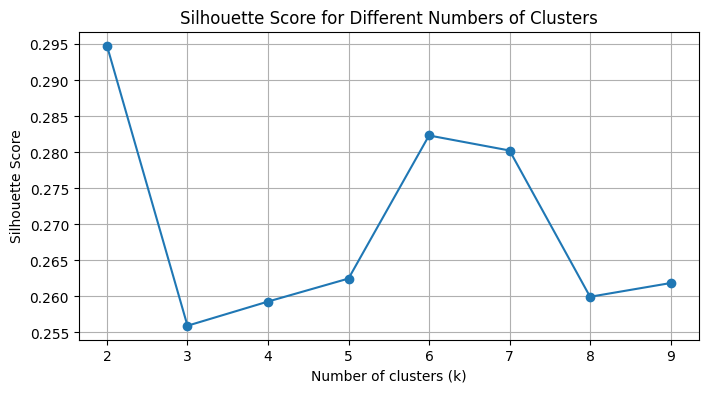

Optimal number of clusters based on silhouette score: 2


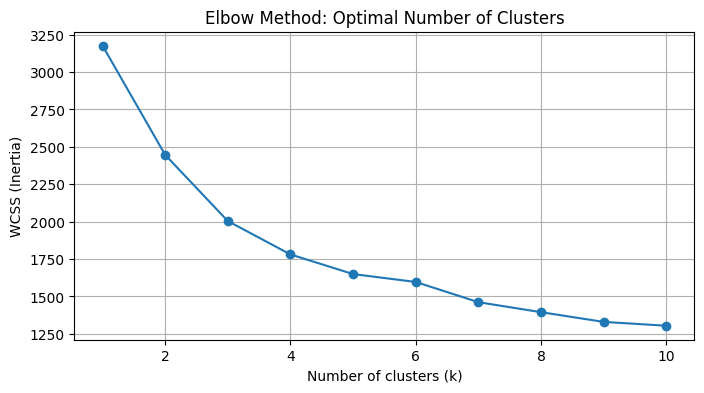

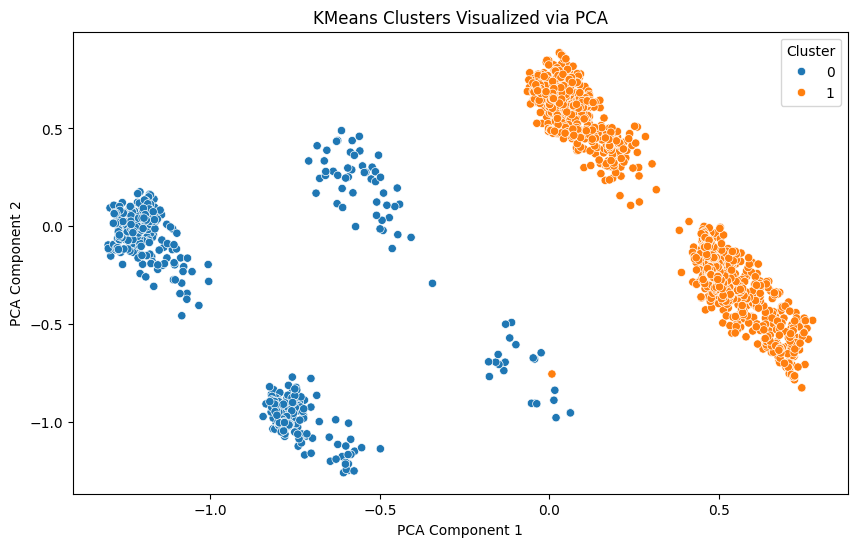

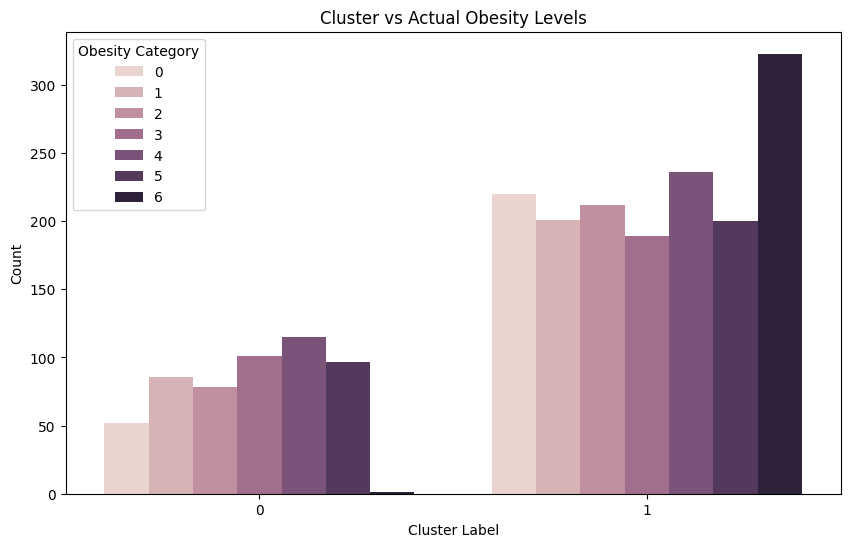

<Axes: title={'center': 'Feature Averages by Cluster'}>

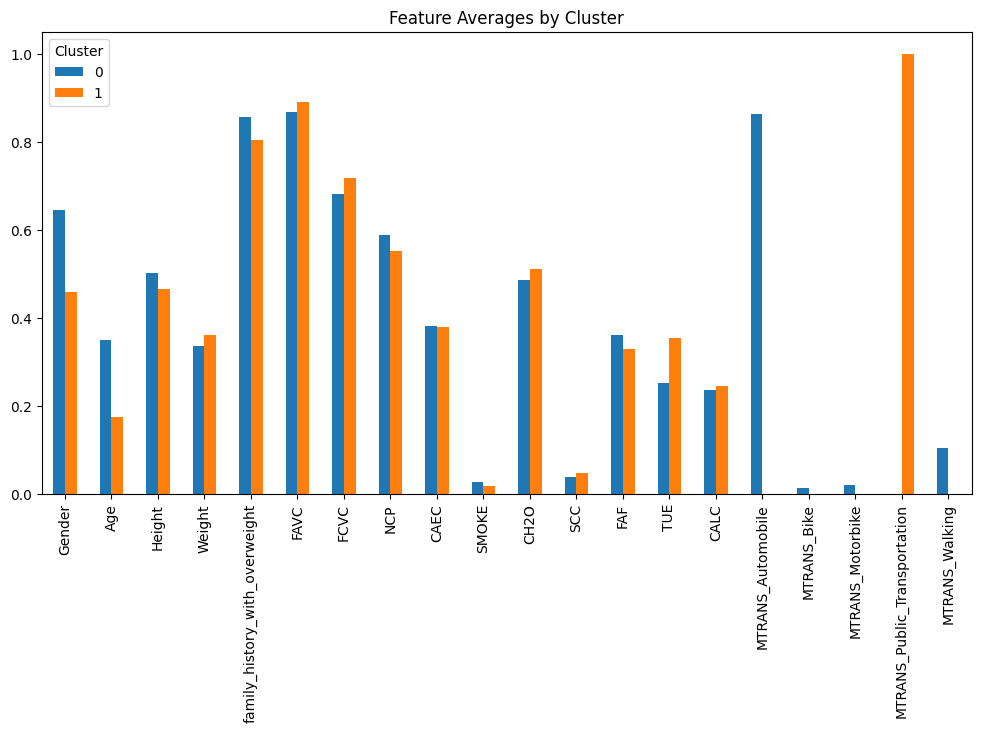

In [ ]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Choose optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Choose optimal k (e.g., the one with highest silhouette score)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters based on silhouette score:", optimal_k)

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame for comparison
df['Cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='tab10')
plt.title('KMeans Clusters Visualized via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Compare clusters to actual obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='NObeyesdad', data=df)
plt.title('Cluster vs Actual Obesity Levels')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Obesity Category')
plt.show()

import pandas as pd

# Add cluster labels back to the data
df['Cluster'] = cluster_labels

# Look at average feature values per cluster
cluster_summary = df.groupby('Cluster')[X.columns].mean().T
cluster_summary.plot(kind='bar', figsize=(12, 6), title='Feature Averages by Cluster')





Category 0 = Insufficient Weight
Category 1 = Normal Weight
Category 2 = Overweight Level I
Category 3 = Overweight Level II
Category 4 = Obesity Type I
Category 5 = Obesity Type II
Category 6 = Obesity Type III
